# Regional CAMS data analysis

This notebook will walk us trough the steps to acces, analyze and visualize regional CAMS model data using mwcs. 

### Access to single products

This section will show you how to retrieve regional CAMS data for a specific time and plot it

The first step is to import all necessary packages

In [33]:
import geopandas as gpd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import adampy as adam

We will define a function to build a query, connect into our servers and download the data

In order to retrieve an image we have to define the collection and time range and call the function we just created

In [18]:
collection = 'EU_CAMS_SURFACE_NO2_G'
#collection = 'EU_CAMS_SURFACE_SO2_G'
#collection = 'EU_CAMS_SURFACE_O3_G'
#collection = 'EU_CAMS_SURFACE_PM10_G'
time_t = '2019-08-01T00:00:00,2019-08-15T00:59:59'

image, metadata = adam.getImage('wcs.top-platform.eu', collection,time_t, fname = 'outputs/eu_global.tif').get_data()

#image, metadata = adam.getImage('wcs.top-platform.eu', collection,time_t, fname = 'outputs/eu_global.tif', min_lat = 35.710838, max_lat= 47.606163, min_long = 5.668945, max_long = 19.819336).get_data()

https://wcs.top-platform.eu/wcs?service=WCS&Request=GetCoverage&version=2.0.0&subset=unix(2019-08-01T00:00:00,2019-08-15T00:59:59)&format=image/tiff&filter=false&CoverageId=EU_CAMS_SURFACE_NO2_G&subset=Lat(-90,90)&subset=Long(-180,180)&token=None&scale=1


Then, we open the image and apply a small offset for correct visualization

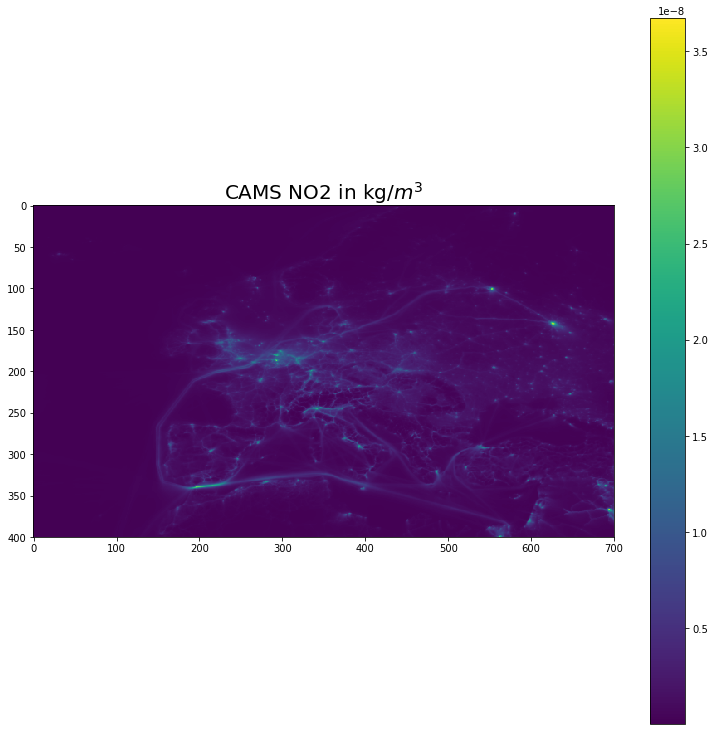

In [19]:
plt.subplots(figsize=(13,13))

if collection == 'EU_CAMS_SURFACE_PM10_G':
    plt.imshow(image)
    plt.colorbar()
    plt.title(r'CAMS {} in $\mu$g/$m^3$'.format(collection.split('_')[-2]), size=20)
else:
    plt.imshow(image)
    plt.colorbar()
    plt.title(r'CAMS {} in kg/$m^3$'.format(collection.split('_')[-2]), size=20)

### Geographic subset

We might be interested in analyzing just a particular area. We can define a new function that takes a bounding box in the query.

As before, let's define the minimum and maximum longitude and latitude, collection and time range, and call the new function

In [22]:
#define bbox
max_lat = 43
min_lat = 40

max_long = 0
min_long = 4

collection = 'EU_CAMS_SURFACE_NO2_G'
#collection = 'EU_CAMS_SURFACE_SO2_G'
#collection = 'EU_CAMS_SURFACE_O3_G'
#collection = 'EU_CAMS_SURFACE_PM10_G'
time_t = '2019-06-01T00:00:00,2019-06-01T23:59:59'

image, metadata = adam.getImage('wcs.top-platform.eu', collection,time_t, min_lat, max_lat, min_long, max_long,fname = 'outputs/eu_cams_subset.tif').get_data()

https://wcs.top-platform.eu/wcs?service=WCS&Request=GetCoverage&version=2.0.0&subset=unix(2019-06-01T00:00:00,2019-06-01T23:59:59)&format=image/tiff&filter=false&CoverageId=EU_CAMS_SURFACE_NO2_G&subset=Lat(40,43)&subset=Long(4,0)&token=None&scale=1


Then, we open the image and apply a small offset for a correct visualization

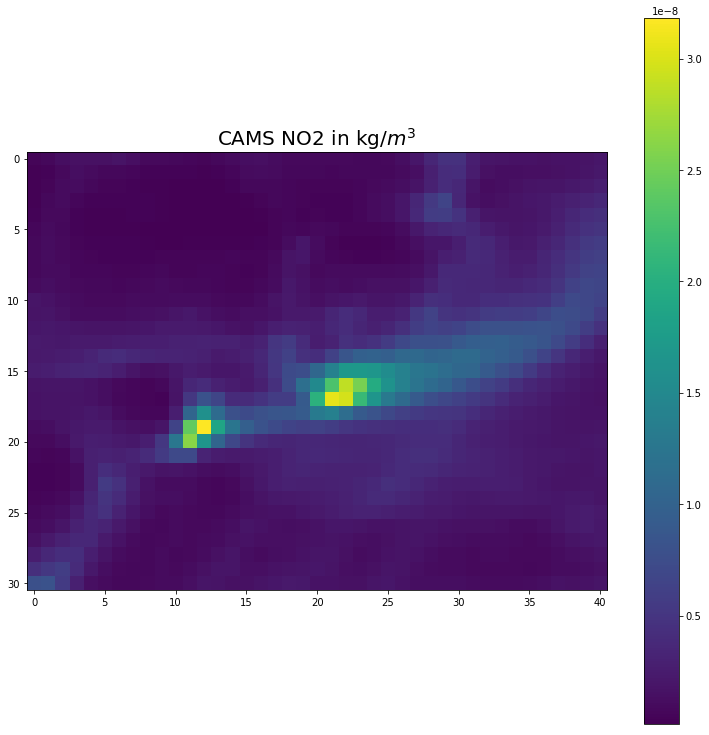

In [25]:
plt.subplots(figsize=(13,13))
if collection == 'EU_CAMS_SURFACE_PM10_G':
    plt.imshow(image)
    plt.colorbar()
    plt.title(r'CAMS {} in $\mu/m^3$'.format(collection.split('_')[-2]), size=20)
else:
    plt.imshow(image)
    plt.colorbar()
    plt.title(r'CAMS {} in kg/$m^3$'.format(collection.split('_')[-2]), size=20)

### Single point time series

Another analysis we can do is to retrieve a time series for a specific location. In that case we will define a function that takes only latitude and longitude of one point as arguments

We define the coordinates, collection and time range and call the new function

In [26]:
lat = 41.890251
long = 12.492373
#collection = 'EU_CAMS_SURFACE_NO2_G'
#collection = 'EU_CAMS_SURFACE_SO2_G'
#collection = 'EU_CAMS_SURFACE_O3_G'
collection = 'EU_CAMS_SURFACE_PM10_G'

time_t = '2019-06-01T00:00:00,2019-06-01T23:59:59'

data, times = adam.getTimeSeries('wcs.top-platform.eu', collection,time_t, lat, long).get_data()

https://wcs.top-platform.eu/wcs?service=WCS&Request=GetCoverage&version=2.0.0&subset=unix(2019-06-01T00:00:00,2019-06-01T23:59:59)&format=application/xml&CoverageId=EU_CAMS_SURFACE_PM10_G&subset=Lat(41.890251)&subset=Long(12.492373)&filter=false&token=None


Once we got the data we just need to plot it:

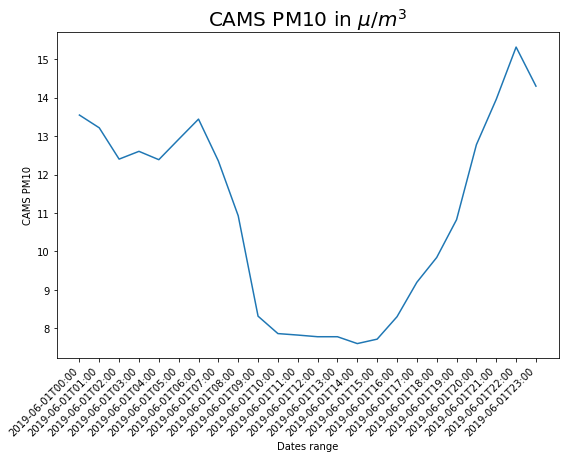

In [30]:
f, ax = plt.subplots(figsize=(9, 6))

if collection == 'EU_CAMS_SURFACE_PM10_G':
    plt.plot(times, data)
    ax.set_xticklabels(labels=times, rotation=45, ha='right')
    ax.set(xlabel='Dates range', ylabel='CAMS {}'.format(collection.split('_')[-2]))
    plt.title(r'CAMS {} in $\mu/m^3$'.format(collection.split('_')[-2]), size=20)
else:
    plt.plot(times, data)
    ax.set_xticklabels(labels=times, rotation=45, ha='right')
    ax.set(xlabel='Dates range', ylabel='CAMS {}'.format(collection.split('_')[-2]))    
    plt.title(r'CAMS {} in kg/$m^3$'.format(collection.split('_')[-2]), size=20)

In [31]:
start_date = date(2019, 4, 1)
end_date = date(2019, 4, 15)
#collection = 'EU_CAMS_SURFACE_NO2_G'
#collection = 'EU_CAMS_SURFACE_SO2_G'
#collection = 'EU_CAMS_SURFACE_O3_G'
collection = 'EU_CAMS_SURFACE_PM10_G'
gif = adam.getAnimation('wcs.top-platform.eu', collection, start_date, end_date, frame_duration = 0.1, legend = False).get_data()

Once all the hourly images are downloaded we can created and visualize the GIF

In [32]:
from IPython.display import Image
Image(url=gif)

# Exercise

* Try finding a dust event (hint: around 29th October 2018) and run an analysis. Create an animation of the event.